In [1]:
import pandas as pd

df = pd.read_csv('diabetes_dataset.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'diabetes_dataset.csv'

In [3]:
import pandas as pd

# Correctly formatted path using raw string
df = pd.read_csv(r'C:\Users\user\Downloads\.ipynb_checkpoints\616 assignment\diabetes_dataset.csv')

# Preview the data
df.head()


,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [4]:
#Inspect the Structure
#To check:
#Number of rows
#Column types
#Missing values

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

Unnamed: 0                          0
Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [5]:
#To check:
#Whether it’s binary or multiclass
#If there’s imbalance

df['class'].value_counts()  # Or whatever your target column is


KeyError: 'class'

In [6]:
# Get all column names
df.columns


Index(['Unnamed: 0', 'Age', 'Sex', 'Ethnicity', 'BMI', 'Waist_Circumference',
       'Fasting_Blood_Glucose', 'HbA1c', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Total', 'Cholesterol_HDL',
       'Cholesterol_LDL', 'GGT', 'Serum_Urate', 'Physical_Activity_Level',
       'Dietary_Intake_Calories', 'Alcohol_Consumption', 'Smoking_Status',
       'Family_History_of_Diabetes', 'Previous_Gestational_Diabetes'],
      dtype='object')

In [8]:

# Check the distribution of values in the target column
# This will help confirm it's a good candidate for classification (should be binary)
df['Family_History_of_Diabetes'].value_counts()


Family_History_of_Diabetes
1    5070
0    4930
Name: count, dtype: int64

In [9]:
# Useful for deciding whether to use stratification or class weights later
df['Family_History_of_Diabetes'].value_counts(normalize=True)


Family_History_of_Diabetes
1    0.507
0    0.493
Name: proportion, dtype: float64

In [7]:
# Drop the unnamed index column that was automatically created during CSV export
df.drop(columns=['Unnamed: 0'], inplace=True)


In [11]:
# Check how many values are missing per column
df.isnull().sum()


Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [8]:
# Fill missing values in 'Alcohol_Consumption' with the most frequent value (mode)
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0])


In [9]:
# Confirm no more missing values in this column
df['Alcohol_Consumption'].isnull().sum()


np.int64(0)

In [10]:
# Check data types and confirm which features are objects
df.dtypes[df.dtypes == 'object']


Sex                        object
Ethnicity                  object
Physical_Activity_Level    object
Alcohol_Consumption        object
Smoking_Status             object
dtype: object

In [11]:
# Step 6: Encode Categorical Variables

# Label encode 'Sex' column manually (binary category)
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

# One-hot encode the multi-class categorical columns
# drop_first=True avoids multicollinearity by dropping the first dummy column for each
df = pd.get_dummies(df, columns=[
    'Ethnicity',
    'Physical_Activity_Level',
    'Alcohol_Consumption',
    'Smoking_Status'
], drop_first=True)


In [12]:
# Preview a few rows of the encoded dataset
df.head()

# Confirm all columns are now numerical
df.dtypes[df.dtypes == 'object']


Series([], dtype: object)

In [13]:
# Define X (features) and y (target)
X = df.drop('Family_History_of_Diabetes', axis=1)  # Drop target from features
y = df['Family_History_of_Diabetes']               # Set target


In [14]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% test set
    stratify=y,              # Preserve class proportions
    random_state=42          # Ensure reproducibility
)



In [19]:
# Step 9: Train and Evaluate Random Forest Classifier

# 1. Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Create and train the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the model
print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_rf))


🔹 Confusion Matrix:
[[471 515]
 [524 490]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       986
           1       0.49      0.48      0.49      1014

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



In [20]:
# Step 10: Try Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("🔹 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_gb))


🔹 Confusion Matrix:
[[415 571]
 [444 570]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       986
           1       0.50      0.56      0.53      1014

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [21]:
# Step 12: Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluatedt_model.fi
print("🔹 Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

print("\n🔹 Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))


🔹 Confusion Matrix (Decision Tree):
[[493 493]
 [498 516]]

🔹 Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       986
           1       0.51      0.51      0.51      1014

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [22]:
# Step 13: Scale features for SVM
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Step 14: Train a Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("🔹 Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))

print("\n🔹 Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


🔹 Confusion Matrix (SVM):
[[465 521]
 [504 510]]

🔹 Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.48      0.47      0.48       986
           1       0.49      0.50      0.50      1014

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



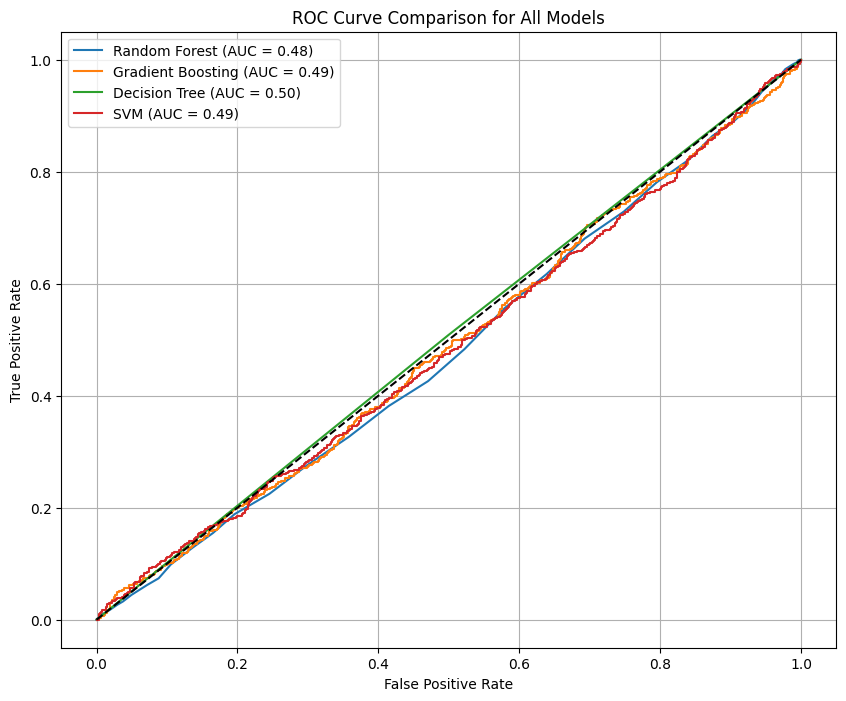

In [24]:
# 📊 Import the required libraries
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# 📁 Dictionary of models for easy iteration
models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Decision Tree': dt_model,
    'SVM': svm_model
}

# ⚖️ Use scaled data only for SVM, others use unscaled X_test
X_test_dict = {
    'Random Forest': X_test,
    'Gradient Boosting': X_test,
    'Decision Tree': X_test,
    'SVM': X_test_scaled
}

# 🖼️ Start a new plot
plt.figure(figsize=(10, 8))

# 📈 Loop through each model to plot its ROC curve
for name, model in models.items():
    # Get predicted probabilities or decision scores
    if hasattr(model, "predict_proba"):
        # Most models (RandomForest, GradientBoost, DecisionTree)
        y_score = model.predict_proba(X_test_dict[name])[:, 1]
    else:
        # For SVM (which doesn't have predict_proba)
        y_score = model.decision_function(X_test_dict[name])

    # Calculate False Positive Rate and True Positive Rate
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    # Compute Area Under the Curve (AUC)
    auc = roc_auc_score(y_test, y_score)
    
    # Plot the ROC line for this model
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# ➖ Add a diagonal dashed baseline (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# 🧾 Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for All Models")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
!pip install imbalanced-learn



   ---------------------------------------- 0/2 [sklearn-compat]
   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn

In [15]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance (random_state ensures reproducibility)
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only (not to the test data!)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check new class distribution after applying SMOTE
import pandas as pd
print("After SMOTE:\n", pd.Series(y_train_sm).value_counts())


After SMOTE:
 Family_History_of_Diabetes
1    4056
0    4056
Name: count, dtype: int64


In [16]:
# 🧪 Import SMOTE
from imblearn.over_sampling import SMOTE

# 🎲 Create SMOTE instance
smote = SMOTE(random_state=42)

# 🚀 Apply SMOTE only to the training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# ✅ Check the new class distribution
import pandas as pd
print("After SMOTE:\n", pd.Series(y_train_sm).value_counts())


After SMOTE:
 Family_History_of_Diabetes
1    4056
0    4056
Name: count, dtype: int64


In [17]:
# ⚙️ Retrain Random Forest with Balanced Data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# 📊 Predict using the same X_test (unchanged)
y_pred_rf = rf_model.predict(X_test)

# 📈 Evaluate
print("🔵 Confusion Matrix (Random Forest after SMOTE):")
print(confusion_matrix(y_test, y_pred_rf))

print("\n📋 Classification Report (Random Forest after SMOTE):")
print(classification_report(y_test, y_pred_rf))


🔵 Confusion Matrix (Random Forest after SMOTE):
[[498 488]
 [535 479]]

📋 Classification Report (Random Forest after SMOTE):
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       986
           1       0.50      0.47      0.48      1014

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [18]:
# 🔁 Retrain Gradient Boosting with Balanced Data
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_sm, y_train_sm)

# 🔮 Predict on original X_test
y_pred_gb = gb_model.predict(X_test)

# 🧾 Evaluate
print("🔷 Confusion Matrix (Gradient Boosting after SMOTE):")
print(confusion_matrix(y_test, y_pred_gb))

print("\n📋 Classification Report (Gradient Boosting after SMOTE):")
print(classification_report(y_test, y_pred_gb))


🔷 Confusion Matrix (Gradient Boosting after SMOTE):
[[501 485]
 [529 485]]

📋 Classification Report (Gradient Boosting after SMOTE):
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       986
           1       0.50      0.48      0.49      1014

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [1]:
# 🌳 Retrain Decision Tree with Balanced Data
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)

print("🔷 Confusion Matrix (Decision Tree after SMOTE):")
print(confusion_matrix(y_test, y_pred_dt))

print("\n📋 Classification Report (Decision Tree after SMOTE):")
print(classification_report(y_test, y_pred_dt))


NameError: name 'X_train_sm' is not defined

In [20]:
# 🤖 Retrain SVM with Balanced Data
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Scale the SMOTE-resampled training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)  # test stays same

# Train the model
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_sm_scaled, y_train_sm)

# Predict
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate
print("🔷 Confusion Matrix (SVM after SMOTE):")
print(confusion_matrix(y_test, y_pred_svm))

print("\n📋 Classification Report (SVM after SMOTE):")
print(classification_report(y_test, y_pred_svm))


🔷 Confusion Matrix (SVM after SMOTE):
[[451 535]
 [498 516]]

📋 Classification Report (SVM after SMOTE):
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       986
           1       0.49      0.51      0.50      1014

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



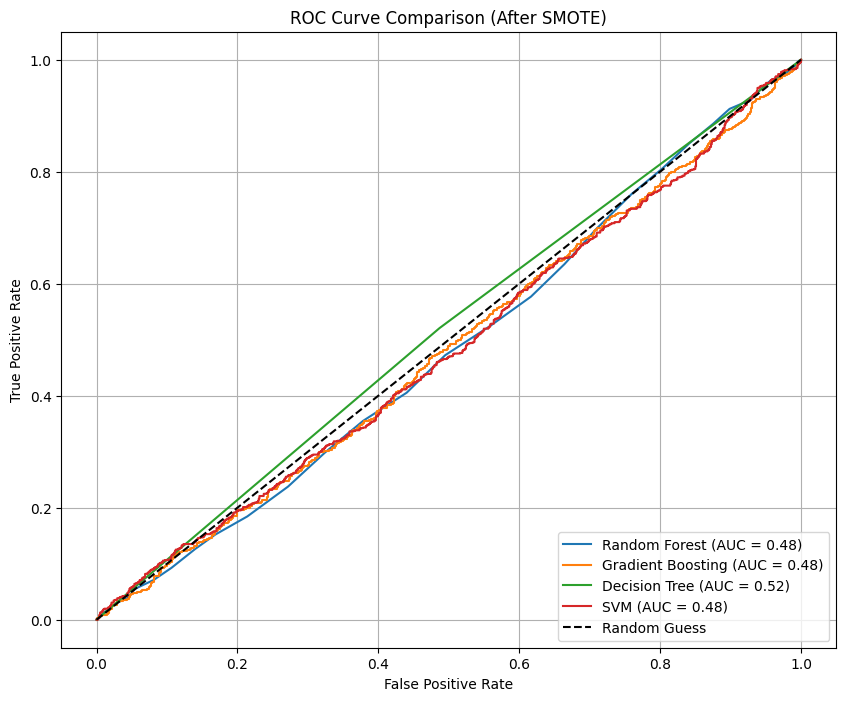

In [21]:
# 📦 Import required modules
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 📊 Get probabilities for ROC curves
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred_gb_proba = gb_model.predict_proba(X_test)[:, 1]
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]
y_pred_svm_proba = svm_model.decision_function(X_test_scaled)  # For SVM

# 📈 Compute ROC curves and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# 🎨 Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# ⚙️ ROC plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (After SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [22]:
from sklearn.model_selection import cross_val_score

# Cross-validate Decision Tree on SMOTE-balanced data
scores = cross_val_score(DecisionTreeClassifier(random_state=42), X_train_sm, y_train_sm, cv=5)

print("CV Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


CV Accuracy Scores: [0.5194085  0.49599507 0.50924784 0.48458693 0.52774353]
Mean CV Accuracy: 0.5073963744052244


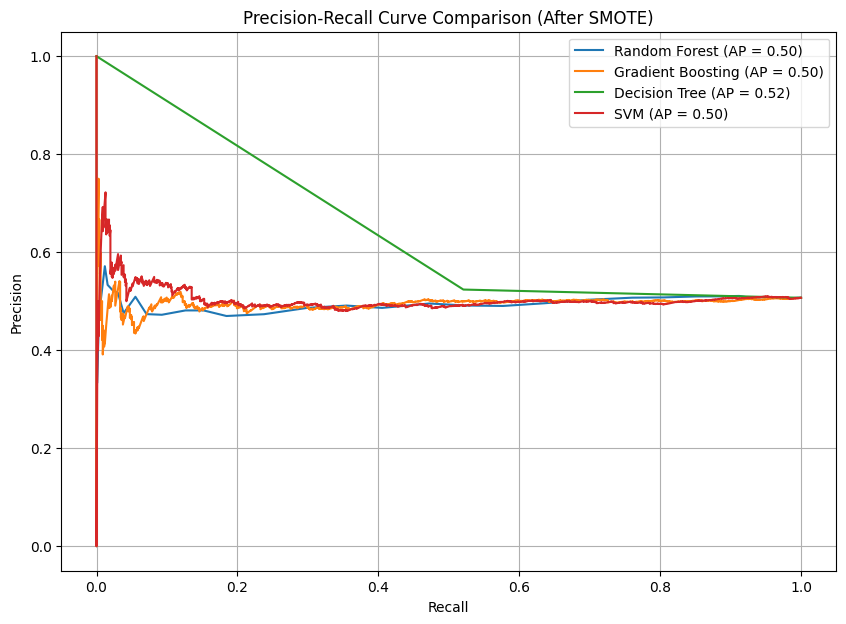

In [23]:
# 📌 Step: Plot Precision-Recall Curves for All Models After SMOTE

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get prediction probabilities for precision-recall
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]
y_probs_svm = svm_model.decision_function(X_test_scaled)

# Compute Precision-Recall curves
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_probs_rf)
precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_probs_gb)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_probs_dt)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_probs_svm)

# Compute Average Precision Scores
ap_rf = average_precision_score(y_test, y_probs_rf)
ap_gb = average_precision_score(y_test, y_probs_gb)
ap_dt = average_precision_score(y_test, y_probs_dt)
ap_svm = average_precision_score(y_test, y_probs_svm)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(recall_rf, precision_rf, label=f"Random Forest (AP = {ap_rf:.2f})")
plt.plot(recall_gb, precision_gb, label=f"Gradient Boosting (AP = {ap_gb:.2f})")
plt.plot(recall_dt, precision_dt, label=f"Decision Tree (AP = {ap_dt:.2f})")
plt.plot(recall_svm, precision_svm, label=f"SVM (AP = {ap_svm:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison (After SMOTE)")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Apply SMOTE (already done earlier)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Scale for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)

# Define models
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', class_weight='balanced', random_state=42)
}

# Measure training time
results = []

for name, model in models.items():
    start = time.time()
    if name == "SVM":
        model.fit(X_train_scaled, y_train_sm)
    else:
        model.fit(X_train_sm, y_train_sm)
    end = time.time()
    duration = end - start
    results.append((name, f"{duration:.4f} seconds"))

# Display results
df_times = pd.DataFrame(results, columns=["Model", "Training Time"])
print(df_times)


               Model   Training Time
0      Random Forest  2.6461 seconds
1  Gradient Boosting  2.8017 seconds
2      Decision Tree  0.1901 seconds
3                SVM  5.4595 seconds
